# Tratamiento de NAs

In [3]:
%cd ..

/home/maxi/docs/fiuba/tp_analisis_de_datos


Tomamos las variables seleccionadas por Ronald

In [4]:
import pandas as pd
import missingno as msno

In [5]:
## Tomo la lista de variables
vars_df = pd.read_csv('data/variables.csv', sep=';')
variables = vars_df[vars_df['eliminate']==False]['variable_name']
# 
# ## Leo el dataset, quedándome solo con las variables de interés
df = pd.read_csv('data/GEDEvent_v25_1.csv')
df = df[variables]
# ## Nota: el warning ocurre porque intenta adivinar los tipos en una base demasiado grande.
# # Lo ideal sería predefinir el tipo en un diccionario. Lo hacemos después

/tmp/ipykernel_16512/1896782100.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/GEDEvent_v25_1.csv')


In [6]:
#vars_df[vars_df['eliminate']==False]
#variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385918 entries, 0 to 385917
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               385918 non-null  int64  
 1   active_year        385918 non-null  bool   
 2   type_of_violence   385918 non-null  int64  
 3   dyad_name          385918 non-null  object 
 4   number_of_sources  385918 non-null  int64  
 5   where_prec         385918 non-null  int64  
 6   where_coordinates  385918 non-null  object 
 7   adm_1              366371 non-null  object 
 8   latitude           385918 non-null  float64
 9   longitude          385918 non-null  float64
 10  priogrid_gid       385918 non-null  int64  
 11  country            385918 non-null  object 
 12  region             385918 non-null  object 
 13  event_clarity      385918 non-null  int64  
 14  date_prec          385918 non-null  int64  
 15  date_start         385918 non-null  object 
 16  da

<Axes: >

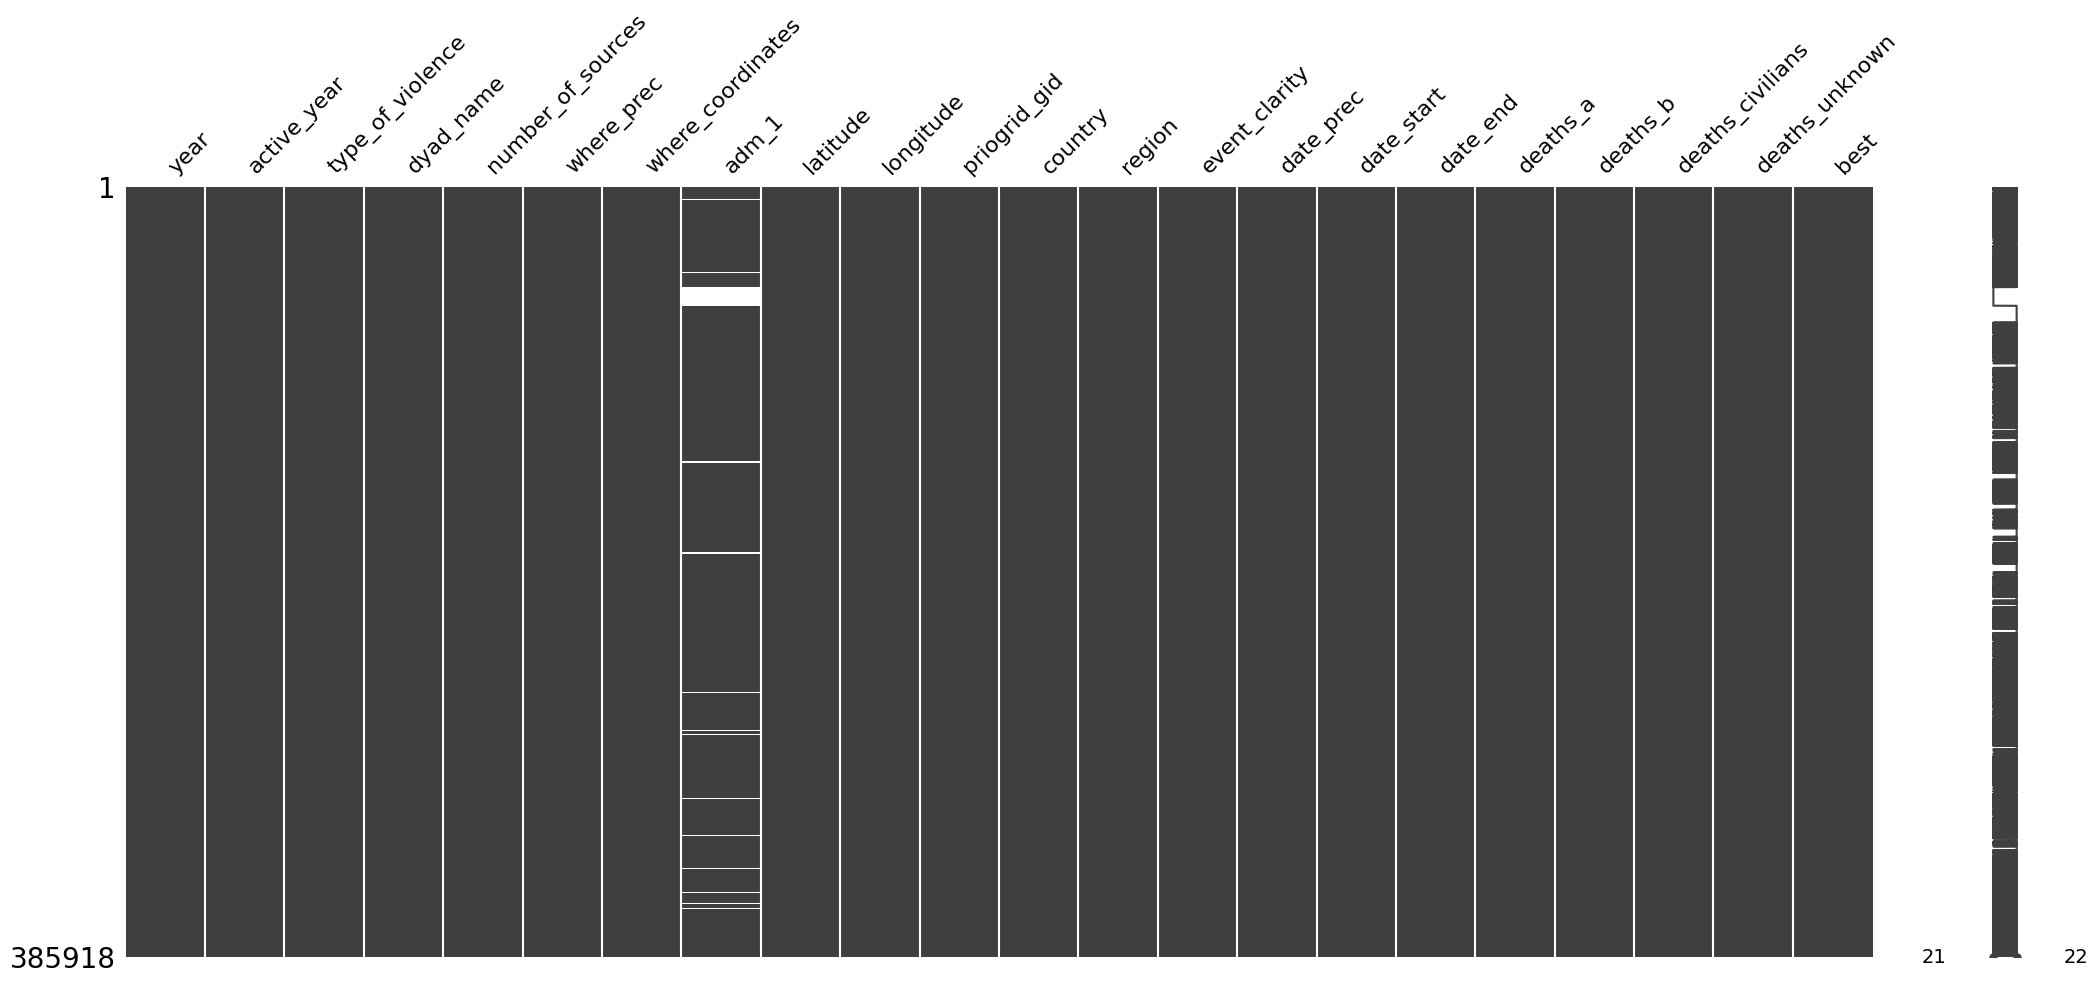

In [7]:
msno.matrix(df)

In [8]:
df.isna().mean()

year                 0.000000
active_year          0.000000
type_of_violence     0.000000
dyad_name            0.000000
number_of_sources    0.000000
where_prec           0.000000
where_coordinates    0.000000
adm_1                0.050651
latitude             0.000000
longitude            0.000000
priogrid_gid         0.000000
country              0.000000
region               0.000000
event_clarity        0.000000
date_prec            0.000000
date_start           0.000000
date_end             0.000000
deaths_a             0.000000
deaths_b             0.000000
deaths_civilians     0.000000
deaths_unknown       0.000000
best                 0.000000
dtype: float64

In [11]:
df.adm_1.isna().mean()

np.float64(0.05065065635704994)

Un 50% de las obs. son NAs

In [9]:
df.adm_1.value_counts()

adm_1
Rif Dimashq governorate        17487
Donetsk oblast                 16222
Aleppo governorate             16151
Idlib governorate               9939
Jammu and Kashmir state         9682
                               ...  
Mayo-Kebbi region                  1
Alabama state                      1
Socotra governorate                1
al-Mahrah governorate              1
Matabeleland North province        1
Name: count, Length: 1682, dtype: int64

Alta cardinalidad. Columna candidata a ser eliminada (discutir)

# vars

In [12]:
vars_df

,variable_name,description,type Pandas,eliminate,comment
0,id,Identificador unico del evento,int64,True,Valor único por observación
1,relid,Identificador interno del evento (cambia si el...,object,True,Valor único por observación
2,year,Ano del evento,int64,False,NaN
3,active_year,True si el evento pertenece a un conflicto act...,bool,False,NaN
4,code_status,Si el registro est ok (clear) o si hay que ch...,object,True,Valor único (solo contiene 'clear')
5,type_of_violence,"Tipo de violencia: 1. Conflicto entre estados,...",int64,False,NaN
6,conflict_dset_id,Identificador deprecado,int64,True,V=1 con [side_a]
7,conflict_new_id,Identificador único del conflicto (usar esto p...,int64,True,V=1 con [side_a]
8,conflict_name,Nombre del conflicto,object,True,V=1 con [side_a]
9,dyad_dset_id,Identificador deprecado,int64,True,V=1 con [side_a]
